In [1]:
# https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
# https://webapps.stackexchange.com/questions/58615/export-all-sheets-in-a-spreadsheet-to-csv-in-google-apps
# https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import seaborn as sns

In [2]:
all_classes = []
for x in range(1, 31):
    file = "./conf_mat_folder_ucf/" + str(x) + ".csv"
    csvreader = csv.reader(open(file, "r"), delimiter=',')
    header = []
    header = next(csvreader)
    header.pop(0)
    all_classes = all_classes + header
all_classes = list(dict.fromkeys(all_classes))
#all_classes.remove("")
all_classes = sorted(all_classes)
print(len(all_classes))

101


In [3]:
dimensions = (101, 101)
conf_mat = np.zeros(dimensions) # 3x3 zeros matrix
df = pd.DataFrame(conf_mat, index=all_classes, columns=all_classes)

In [ ]:
#df.to_csv('final_cm_hmdb51.csv')

In [4]:
for x in range(1, 31):
    print(x)
    file = "./conf_mat_folder_ucf/" + str(x) + ".csv"
    split_cf = pd.read_csv(file,index_col='class')
    for x in range(0, 50):
        for y in range(0, 50):
            value = split_cf.iloc[x,y]
            col = split_cf.columns[x]
            row = split_cf.index[y]
            df.loc[row, col] = df.loc[row, col] + value

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [5]:
df.round(0)
df

,Apply Eye Makeup,Apply Lipstick,Archery,Baby Crawling,Balance Beam,Band Marching,Baseball Pitch,Basketball Dunk,Basketball Shooting,Bench Press,...,Tennis Swing,Throw Discus,Trampoline Jumping,Typing,Uneven Bars,Volleyball Spiking,Walking With Dog,Wall Pushups,Writing On Board,Yo Yo
Apply Eye Makeup,878.0,229.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0
Apply Lipstick,150.0,945.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,5.0,0.0
Archery,0.0,0.0,737.0,0.0,0.0,13.0,11.0,0.0,1.0,0.0,...,4.0,5.0,0.0,0.0,0.0,3.0,2.0,0.0,5.0,68.0
Baby Crawling,1.0,1.0,4.0,1947.0,0.0,8.0,0.0,0.0,0.0,8.0,...,0.0,0.0,5.0,216.0,0.0,0.0,5.0,24.0,0.0,2.0
Balance Beam,0.0,0.0,0.0,1.0,1341.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,0.0,32.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volleyball Spiking,0.0,0.0,0.0,0.0,1.0,0.0,6.0,2.0,35.0,0.0,...,10.0,34.0,9.0,0.0,0.0,235.0,0.0,0.0,0.0,0.0
Walking With Dog,0.0,0.0,104.0,28.0,0.0,148.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,25.0,0.0,0.0,809.0,0.0,0.0,9.0
Wall Pushups,0.0,0.0,19.0,4.0,0.0,0.0,1.0,0.0,0.0,7.0,...,0.0,0.0,11.0,0.0,0.0,0.0,0.0,960.0,40.0,6.0
Writing On Board,0.0,0.0,20.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,66.0,0.0,0.0,0.0,5.0,103.0,1.0


In [ ]:
df.round()
df.style.background_gradient(cmap ='RdYlBu')\
        .set_properties(**{'font-size': '10px'})

In [ ]:
# Displaying dataframe as an heatmap
# with diverging colourmap as RdYlBu
plt.rcParams["figure.figsize"] = (30,30)
plt.imshow(df, cmap ="RdYlBu")
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
# according to dataframe
plt.xticks(range(len(df)), df.columns)
  
# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(df)), df.index)
  
# Displaying the figure
plt.show()

In [ ]:
df.style.background_gradient(cmap='Blues')

In [6]:
df.to_csv('combined_confusion_matrix_ucf.csv')

In [205]:
#file = "combined_confusion_matrix_hmdb.csv"
file = "combined_confusion_matrix_ucf.csv"
df = pd.read_csv(file,index_col='class',delimiter=',')
thresh = 400

# set diagonal value
df = df.where(df.values != np.diag(df),0,df.where(df.values != np.flipud(df).diagonal(0),0,inplace=True))

# remove col
for cls in df.columns:
    if ~(df[cls]>=thresh).any():
        df.drop(columns=[cls], inplace=True)

# remove row
for cls in df.index:
    if ~(df.loc[cls]>=thresh).any():
        df.drop([cls], inplace=True)
df.to_csv('refine_ucf101.csv',index='class')
print(df.shape)
# run only once

ValueError: Index Actual Class invalid

In [200]:
df_miscls[col]

class
Balance Beam                  0
Baseball Pitch                0
Basketball Shooting           0
Body Weight Squats            0
Brushing Teeth               90
Cricket Bowling               0
Hammer Throw                  0
Juggling Balls                0
Playing Dhol                  0
Playing Tabla                12
Playing Violin                3
Punch                         0
Shaving Beard               600
Skijet                        0
total misclassification    1304
Name: Blow Dry Hair, dtype: int64

In [217]:
f = "miscls_rate_hmdb51.csv"
df_miscls = pd.read_csv(f,index_col='Actual Class', delimiter=',')
mis = 0
for col in df_miscls.columns:
    df_miscls[col] = ((df_miscls[col] / df_miscls.loc['total misclassification'][mis]) * 100).round(decimals = 2)
    mis += 1

df_miscls.drop(['total misclassification'], inplace=True)
df_miscls

,catch,flic flac,run,somersault,walk
Actual Class,,,,,
cart wheel,1.14,38.24,1.20,33.00,0.00
fall floor,0.00,0.00,9.79,2.04,8.78
hand stand,0.35,8.88,0.77,33.29,0.00
kick ball,24.75,0.00,4.26,0.56,0.43
ride bike,0.25,0.00,16.26,0.07,2.68
somersault,0.00,43.37,0.23,0.00,0.09
stand,0.00,0.19,0.46,0.35,11.83
talk,0.00,0.00,1.01,0.00,8.31
wave,0.45,0.00,1.01,0.00,10.92


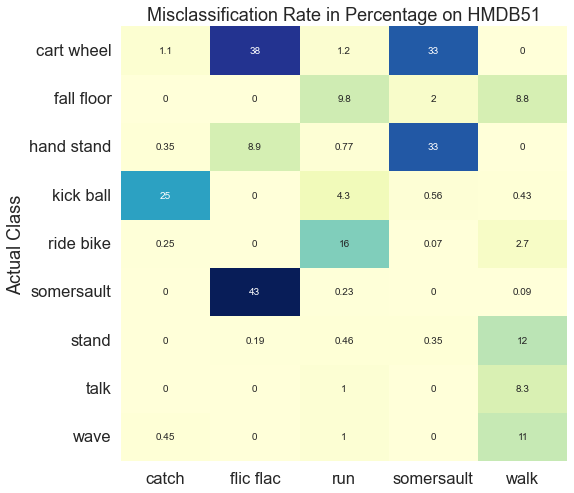

In [220]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,8))

ax.set_title('Misclassification Rate in Percentage on HMDB51')

hm = sns.heatmap(df_miscls, annot=True, cmap="YlGnBu", cbar=False)

fig.savefig('miscls_hmdb.eps',
            dpi=1200,
            bbox_inches='tight')

In [113]:
from PIL import Image

In [117]:
image_png = 'tfvaegan.png'
im = Image.open(image_png)
print(im.mode)
fig = im.convert('RGB')
fig.save('tfvaegan.eps', lossless = True)

P
